<a href="https://colab.research.google.com/github/JilsyXavier/Predictive_ML_Model_Consumer_Analysis-/blob/main/CONSUMER_COMPLAINT_RESOLUTION_MODELJilsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONSUMER COMPLAINT RESOLUTION ANALYSIS**

Product review is the most basic function/factor in resolving customer issues and
increasing the sales growth of any product. We can understand their mindset toward our service
without asking each customer.
When consumers are unhappy with some aspect of a business, they reach out to customer
service and might raise a complaint. Companies try their best to resolve the complaints that they
receive. However, it might not always be possible to appease every customer.
So Here, we will analyze data, and with the help of different algorithms, we are finding the best
classification of customer category so that we can predict our test data.


**Objective**

The main objective is to predict whether our customer is disputed or not with the help of given
data

In [ ]:
#import libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import datetime
from sklearn.impute import SimpleImputer
import string
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df1=pd.read_csv('Consumer_Complaints_train.csv')
df2=pd.read_csv('Consumer_Complaints_test.csv')

In [ ]:
df1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [ ]:
df2.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

In [ ]:
 df1_types=pd.DataFrame(df1.dtypes, columns = ['Train'])

In [ ]:
 df2_types=pd.DataFrame(df2.dtypes, columns = ['Test'])

In [ ]:
data_types = pd.concat([df1_types, df2_types], axis = 1)
data_types

,Train,Test
Date received,object,object
Product,object,object
Sub-product,object,object
Issue,object,object
Sub-issue,object,object
Consumer complaint narrative,object,object
Company public response,object,object
Company,object,object
State,object,object
ZIP code,object,object


In [ ]:
df1.shape, df2.shape

((358810, 18), (119606, 17))

In [ ]:
df1.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df2.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [ ]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df1 = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df1

,percent_missing
Date received,0.000000
Product,0.000000
Sub-product,28.925058
Issue,0.000000
Sub-issue,61.139322
Consumer complaint narrative,84.342688
Company public response,81.067696
Company,0.000000
State,0.809063
ZIP code,0.811293


In [ ]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df2 = pd.DataFrame({
                                 'percent_missing': percent_missing})
missing_value_df2

,percent_missing
Date received,0.000000
Product,0.000000
Sub-product,28.997709
Issue,0.000000
Sub-issue,61.242747
Consumer complaint narrative,84.186412
Company public response,81.221678
Company,0.000000
State,0.782569
ZIP code,0.783406


In [ ]:
Missing_values=pd.concat([missing_value_df1,missing_value_df2],axis=1)
Missing_values.rename(columns={'percent_missing':'Train','percent_missing':'Test'},inplace=True)
Missing_values

,Test,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


Drop columns where more than 25% of data are missing

In [ ]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df1= df1.drop(missing_values, axis = 1)
df2= df2.drop(missing_values, axis = 1)

Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

In [ ]:
df1['Date received'] = pd.to_datetime(df1['Date received'], errors='coerce')
df1['Year'] = df1['Date received'].dt.strftime('%Y')
df1['Month'] = df1['Date received'].dt.strftime('%m')
df1['Day'] = df1['Date received'].dt.strftime('%d')
df1

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year,Month,Day
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,04,26
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,2013,12,20
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,2016,03,03
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,2015,01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,2014-04-14,Credit reporting,Incorrect information on credit report,Experian,OR,97306,Web,2014-04-13,Closed with non-monetary relief,Yes,No,806868,2014,04,14
358806,2013-03-14,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,43026,Referral,2013-03-18,Closed with non-monetary relief,Yes,No,355254,2013,03,14
358807,2013-02-01,Credit card,Payoff process,Capital One,TX,76021,Web,2013-02-01,Closed,Yes,Yes,283994,2013,02,01
358808,2015-06-25,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,33256,Phone,2015-06-29,Closed with non-monetary relief,Yes,No,1438670,2015,06,25


In [ ]:
df2['Date received'] = pd.to_datetime(df2['Date received'], errors='coerce')
df2['Year'] = df2['Date received'].dt.strftime('%Y')
df2['Month'] = df2['Date received'].dt.strftime('%m')
df2['Day'] = df2['Date received'].dt.strftime('%d')
df2

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year,Month,Day
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,01,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,06,22
2,2015-09-04,Credit card,Credit line increase/decrease,Capital One,NC,271XX,Web,2015-09-04,Closed with explanation,Yes,1552090,2015,09,04
3,2016-05-17,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,634XX,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,2016,05,17
4,2016-07-07,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,296XX,Web,2016-07-07,Closed with explanation,Yes,2001667,2016,07,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,2015-02-09,Credit card,Credit determination,Citibank,IL,60803,Web,2015-02-09,Closed with explanation,Yes,1230729,2015,02,09
119602,2012-11-13,Credit card,Balance transfer,Capital One,KS,67114,Web,2012-11-14,Closed with explanation,Yes,189749,2012,11,13
119603,2012-05-15,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,95691,Referral,2012-05-15,Closed without relief,Yes,78574,2012,05,15
119604,2015-06-07,Credit reporting,Incorrect information on credit report,Experian,OH,436XX,Web,2015-06-07,Closed with explanation,Yes,1409765,2015,06,07


Calculate the Number of Days the Complaint was with the Company and create a new
field as “Days held”

ie Days held = Date sent to company - Date received

In [ ]:
df1['Date sent to company'] = pd.to_datetime(df1['Date sent to company'])
df2['Date sent to company'] = pd.to_datetime(df2['Date sent to company'])

In [ ]:
df1['Days Held']=df1['Date sent to company']-df1['Date received']
df2['Days Held']=df2['Date sent to company']-df2['Date received']


Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID"

In [ ]:
df1 = df1.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df2 = df2.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

Imputing Null value in “State” by Mode

In [ ]:

df1['State'].mode(),df2['State'].mode()

(0    CA
 Name: State, dtype: object,
 0    CA
 Name: State, dtype: object)

In [ ]:
df1['State'] = df1['State'].fillna(value='CA')
df2['State'] = df2['State'].fillna(value='CA')

create a new field 'Week_Received' where
we calculate the week based on the day of receiving.

Using binning and apply cut() function to the column day

In [ ]:
# define the bins for week grouping
bins = np.array([0, 8, 16, 22, np.inf])#np.inf for infinity
# define the labels for each bin
labels = [1, 2, 3, 4]

df1['Day'] =df1['Day'].astype(float)
df2['Day'] =df2['Day'].astype(float)


# apply the cut function to the Day_Received column of the train and test dataframes
df1['Week_Received'] = pd.cut(df1['Day'], bins=bins, labels=labels, include_lowest=True)
df2['Week_Received'] = pd.cut(df2['Day'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df1

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days Held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,14.0,0 days,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,04,26.0,0 days,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,20.0,14 days,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,03,3.0,1 days,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,01,30.0,0 days,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Incorrect information on credit report,Experian,OR,Web,Closed with non-monetary relief,Yes,No,2014,04,14.0,-1 days,2
358806,Mortgage,"Loan modification,collection,foreclosure",Citibank,OH,Referral,Closed with non-monetary relief,Yes,No,2013,03,14.0,4 days,2
358807,Credit card,Payoff process,Capital One,TX,Web,Closed,Yes,Yes,2013,02,1.0,0 days,1
358808,Debt collection,Cont'd attempts collect debt not owed,Encore Capital Group,FL,Phone,Closed with non-monetary relief,Yes,No,2015,06,25.0,4 days,4


In [ ]:
df2

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year,Month,Day,Days Held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,01,17.0,0 days,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,06,22.0,0 days,3
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,09,4.0,0 days,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,05,17.0,3 days,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,07,7.0,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119601,Credit card,Credit determination,Citibank,IL,Web,Closed with explanation,Yes,2015,02,9.0,0 days,2
119602,Credit card,Balance transfer,Capital One,KS,Web,Closed with explanation,Yes,2012,11,13.0,1 days,2
119603,Mortgage,"Loan modification,collection,foreclosure",Bank of America,CA,Referral,Closed without relief,Yes,2012,05,15.0,0 days,2
119604,Credit reporting,Incorrect information on credit report,Experian,OH,Web,Closed with explanation,Yes,2015,06,7.0,0 days,1


Store data of disputed people into the “disputed_cons” variable for future tasks

In [ ]:
disputed_cons = df1[df1['Consumer disputed?'] == 'Yes']
disputed_cons

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year,Month,Day,Days Held,Week_Received
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,04,26.0,0 days,4
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,01,30.0,0 days,4
5,Credit card,APR or interest rate,TD Bank US Holding Company,FL,Web,Closed with explanation,Yes,Yes,2014,01,10.0,5 days,2
7,Credit card,Payoff process,Capital One,IL,Web,Closed with explanation,Yes,Yes,2015,12,7.0,0 days,1
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,2012,04,5.0,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358787,Mortgage,Credit decision / Underwriting,JPMorgan Chase & Co.,CA,Postal mail,Closed with explanation,Yes,Yes,2014,05,30.0,5 days,4
358791,Mortgage,"Loan modification,collection,foreclosure",Bank of America,TX,Referral,Closed with explanation,Yes,Yes,2013,08,12.0,1 days,2
358797,Debt collection,Cont'd attempts collect debt not owed,"Convergent Resources, Inc.",IN,Web,Closed with explanation,Yes,Yes,2016,06,20.0,0 days,3
358798,Credit reporting,Incorrect information on credit report,Equifax,IL,Web,Closed with non-monetary relief,Yes,Yes,2013,02,26.0,0 days,4


Plot bar graph for the total no of disputes with the help of seaborn

Text(0, 0.5, 'Count')

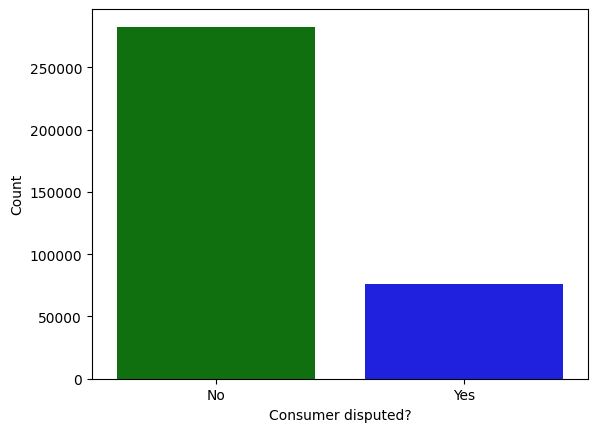

In [ ]:
sns.countplot(x="Consumer disputed?",data=df1,palette=['green','blue'])
plt.xlabel('Consumer disputed?')
plt.ylabel('Count')

*Here we creates a bar chart using the Seaborn library that shows the number of occurrences of each unique value in the "Consumer disputed?" column of the train  DataFrame.*

Plot bar graph for the total no of disputes products-wise with help of seaborn

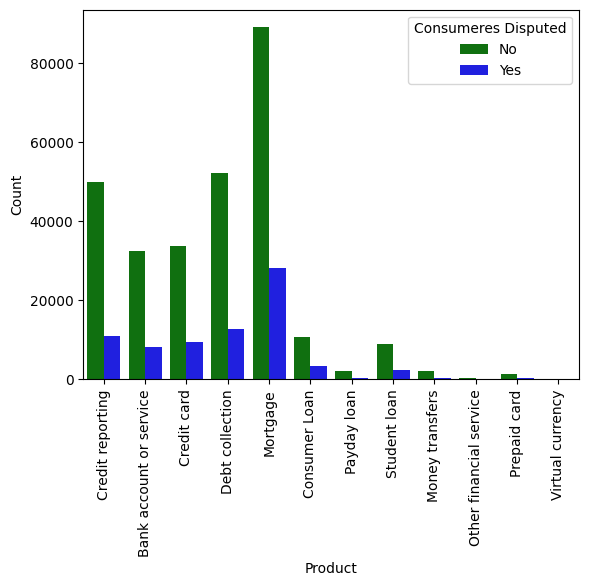

In [ ]:
sns.countplot(x="Product",hue="Consumer disputed?",data=df1,palette=['green','blue'])#hue function to seperate values in consumer disputed column
plt.xlabel('Product')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title ="Consumeres Disputed")

*It showsthe frequency of disputed and not disputed consumers based on the category of products.italicized text*

Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

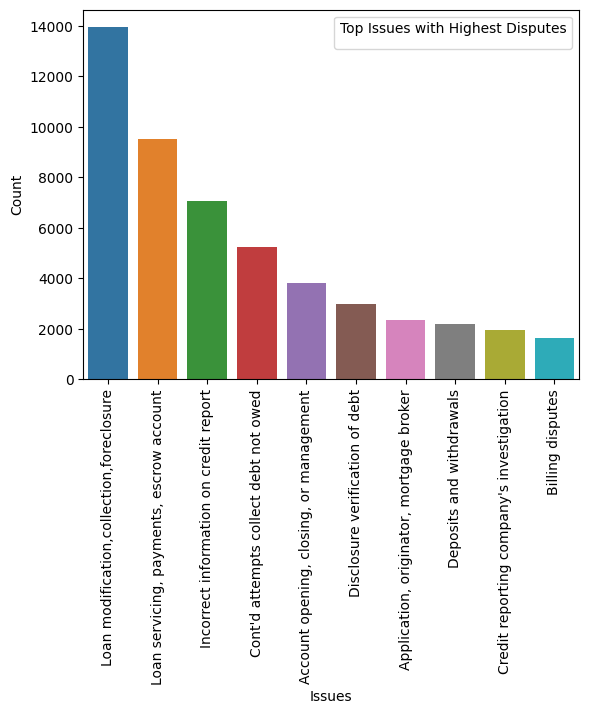

In [ ]:
top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xlabel('Issues')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title ="Top Issues with Highest Disputes")

*Here we demonstrates the top 10 most common consumer issues that were disputed*

Plot bar graph of the total no of disputes by State with Maximum Disputes

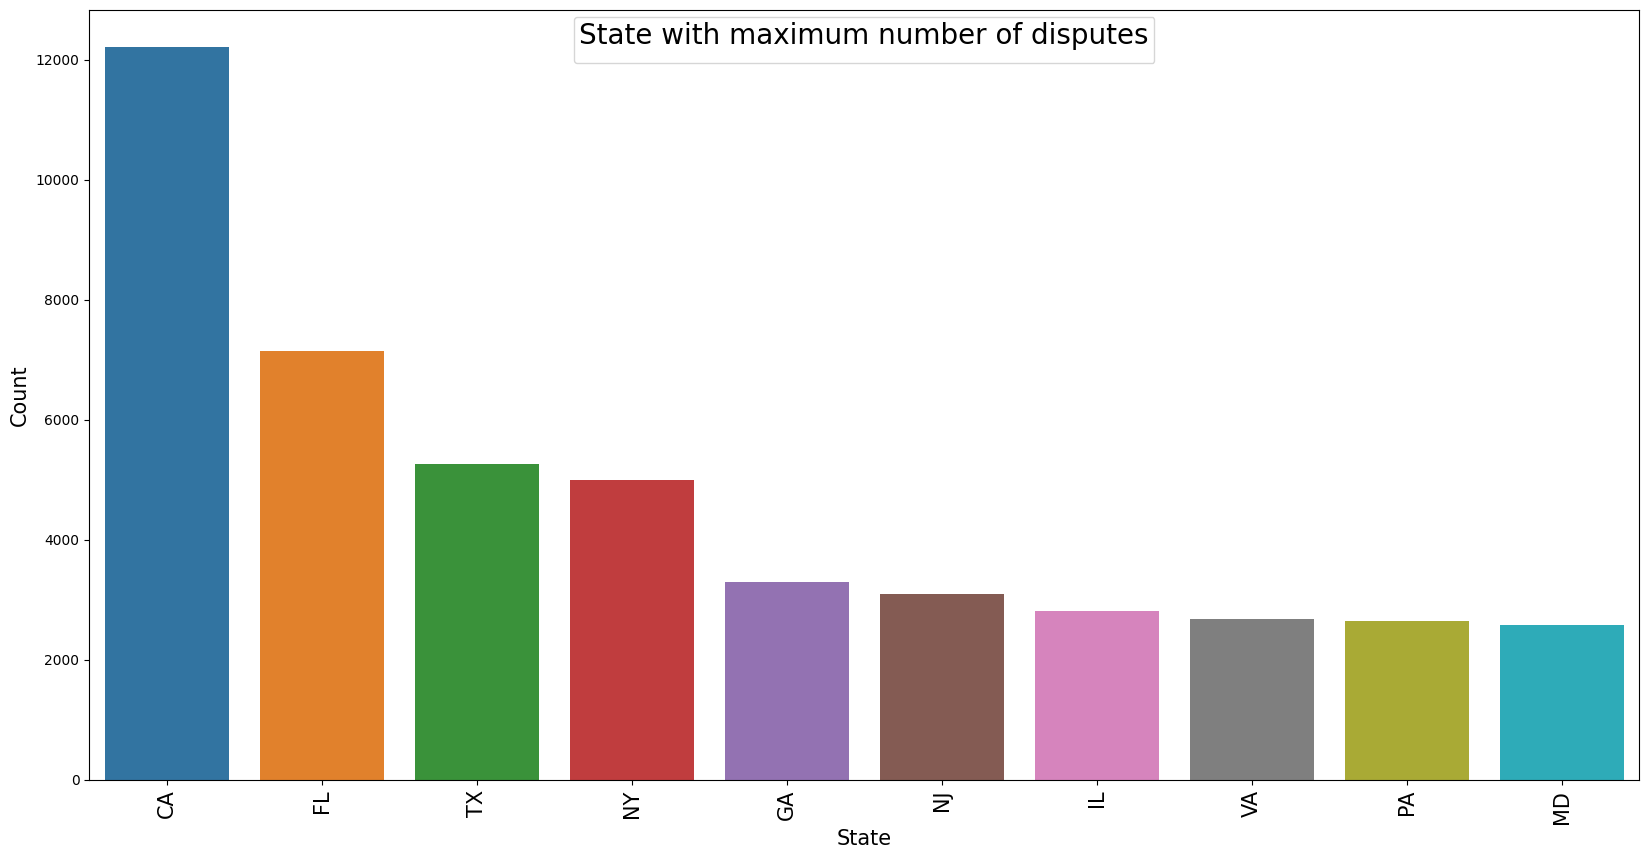

In [ ]:
from matplotlib.font_manager import FontProperties
max_dispute_state=disputed_cons['State'].value_counts().sort_values(ascending = False).head(10)
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x = max_dispute_state.index,y=max_dispute_state.values)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(title='State with maximum number of disputes',title_fontsize = 20,loc='upper center')

*The above graph shows the states that reported maximum number of disputes*

Plot bar graph of the total no of disputes Submitted Via different source

Text(0, 0.5, 'Count')

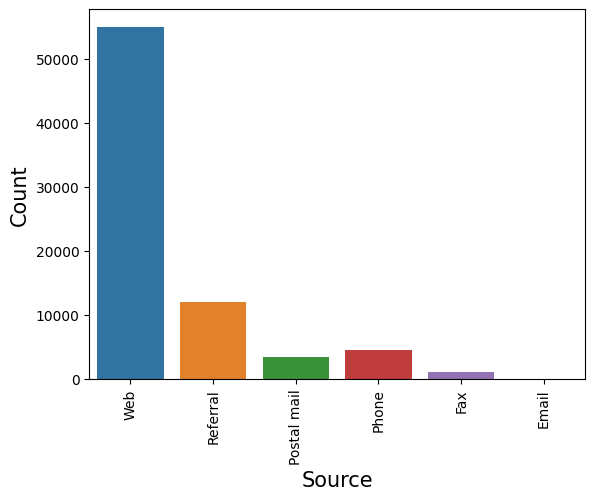

In [ ]:
sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Source', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

*The above plot shows the number of disputed consumers from each source*

Plot bar graph for the total no of disputes where Company's Response to the Complaints

Text(0, 0.5, 'Count')

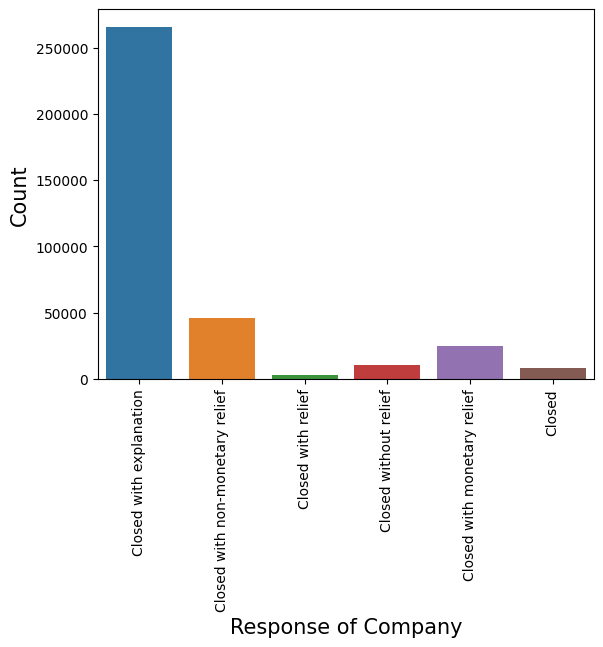

In [ ]:
sns.countplot(x = 'Company response to consumer', data = df1)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

*82% disputes are closed with explanation at the initial stage*
*89% disputes are either closed with explanation or non-monetary relief in the earlier stage*

Plot bar graph of the total no of disputes where the Company's Response Leads to
Disputes

Text(0, 0.5, 'Count')

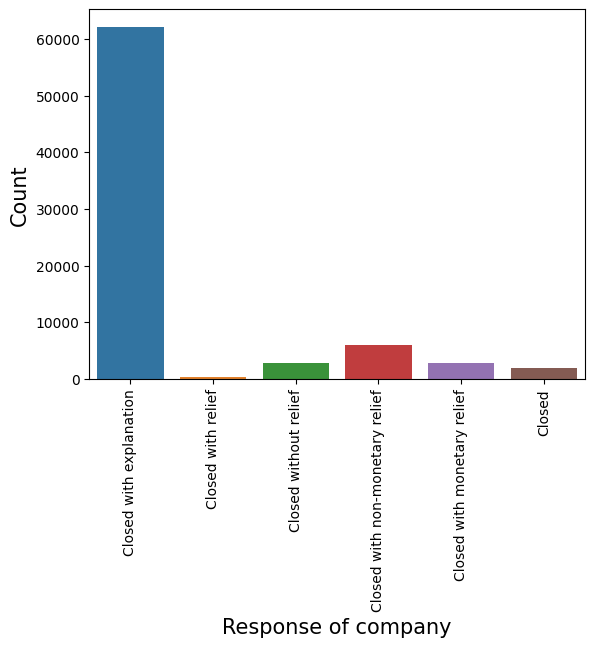

In [ ]:
sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

Text(0, 0.5, 'Count')

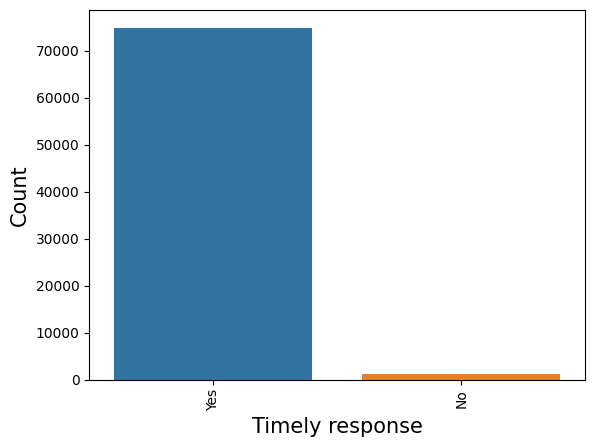

In [ ]:
sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely response', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

*It shows that usualy the company respond to issues timely ,there is only 2% disputes based on not geting response*

Plot bar graph of the total no of disputes over Year Wise Complaints

Text(0, 0.5, 'Count')

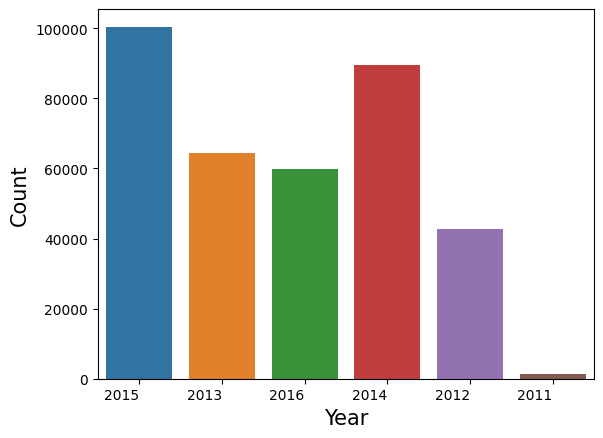

In [ ]:
sns.countplot(x = 'Year', data = df1)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph of the total no of disputes over Year Wise Disputes

Text(0, 0.5, 'Count')

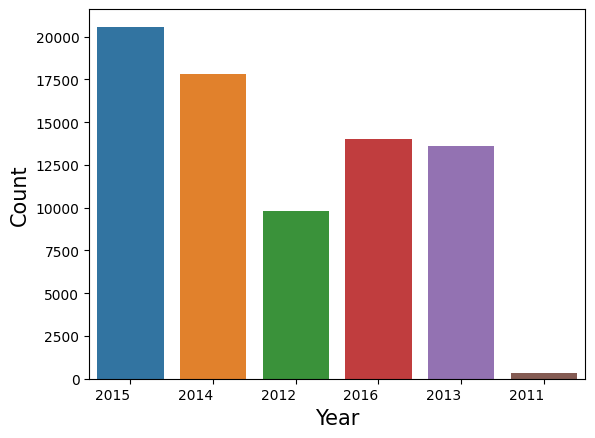

In [ ]:
sns.countplot(x = 'Year', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Plot bar graph for the top companies with Highest Complaints

Text(0, 0.5, 'Count')

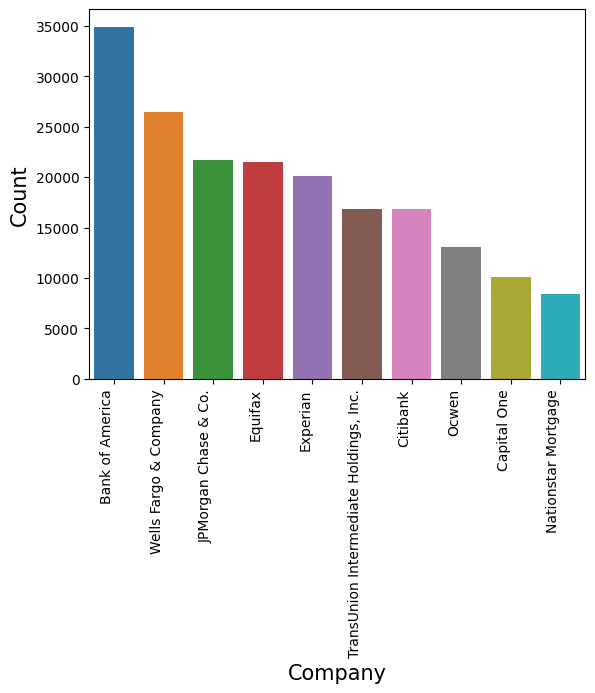

In [ ]:
company_most_complaints = df1['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = company_most_complaints.index, y = company_most_complaints.values)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

Convert negative values in Days held column to zero

In [ ]:
df1['Days Held'].describe()

count                        358810
mean      4 days 10:57:07.690421114
std      16 days 17:48:00.827311545
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 4 days 00:00:00
max               993 days 00:00:00
Name: Days Held, dtype: object

In [ ]:
df2['Days Held'].describe()

count                        119606
mean      4 days 10:38:47.602294199
std      16 days 05:36:03.796515735
min               -1 days +00:00:00
25%                 0 days 00:00:00
50%                 1 days 00:00:00
75%                 4 days 00:00:00
max               832 days 00:00:00
Name: Days Held, dtype: object

In [ ]:
df1['Days Held'] =df1['Days Held'].astype(int)
df2['Days Held'] =df2['Days Held'].astype(int)
def non_negative_days(x):
    if x < 0:
        return 0
    else:
        return x

df1['Days_Held_Train'] = df1['Days Held'].apply(non_negative_days)
df2['Days_Held_Test'] = df2['Days Held'].apply(non_negative_days)

In [ ]:
df1['Days_Held_Train'].describe()

count    3.588100e+05
mean     3.860234e+14
std      1.446186e+15
min      0.000000e+00
25%      0.000000e+00
50%      8.640000e+13
75%      3.456000e+14
max      8.579520e+16
Name: Days_Held_Train, dtype: float64

In [ ]:
df2['Days_Held_Test'].describe()

count    1.196060e+05
mean     3.849274e+14
std      1.402259e+15
min      0.000000e+00
25%      0.000000e+00
50%      8.640000e+13
75%      3.456000e+14
max      7.188480e+16
Name: Days_Held_Test, dtype: float64

**TEXT PREPROCESSING**

In [ ]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Tokenize the text
    tokens = wordpunct_tokenize(text.lower())

    # Remove punctuation and stop words
    filtered_tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]

    # Lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token, pos='v') for token in filtered_tokens]

    # Stem the tokens
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]

    # Join the tokens back into a sentence
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply the preprocessing function to the "Issue" column of the training and test dataframes
clean_data_train = df1['Issue'].apply(preprocess_text)
clean_data_test = df2['Issue'].apply(preprocess_text)

In [ ]:
df1['Issues_cleaned'] = clean_data_train
df2['Issues_cleaned'] = clean_data_test
df1= df1.drop('Issue', axis = 1)
df2= df2.drop('Issue', axis = 1)

Drop Unnecessary Columns for the Model Building
like:'Company', 'State', 'Year_Received', 'Days_held'

In [ ]:
drop_cols = ['Company', 'State', 'Year', 'Days Held']
df1= df1.drop(drop_cols, axis = 1)
df2= df2.drop(drop_cols, axis = 1)

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [ ]:
df1['Consumer disputed?'] = np.where(df1['Consumer disputed?'] == "Yes", 1, 0)

**Create Dummy Variables for catagorical features**
Create Dummy Variables for categorical features and concat with the original data frame
like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'?

In [ ]:
dummy_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df1[dummy_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df2[dummy_cols], prefix_sep = '_', drop_first = True)

In [ ]:
df1

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month,Day,Week_Received,Days_Held_Train,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,0,10,14.0,2,0,incorrect inform credit report
1,Bank account or service,Web,Closed with explanation,Yes,1,04,26.0,4,0,deposit withdraw
2,Credit card,Phone,Closed with non-monetary relief,Yes,0,12,20.0,3,1209600000000000,
3,Debt collection,Referral,Closed with explanation,Yes,0,03,3.0,1,86400000000000,disclosur verif debt
4,Debt collection,Web,Closed with explanation,Yes,1,01,30.0,4,0,disclosur verif debt
...,...,...,...,...,...,...,...,...,...,...
358805,Credit reporting,Web,Closed with non-monetary relief,Yes,0,04,14.0,2,0,incorrect inform credit report
358806,Mortgage,Referral,Closed with non-monetary relief,Yes,0,03,14.0,2,345600000000000,loan modif collect foreclosur
358807,Credit card,Web,Closed,Yes,1,02,1.0,1,0,payoff process
358808,Debt collection,Phone,Closed with non-monetary relief,Yes,0,06,25.0,4,345600000000000,cont attempt collect debt owe


In [ ]:
df1= df1.drop(dummy_cols, axis = 1)
df2= df2.drop(dummy_cols, axis = 1)
df1= pd.concat([df1, df_train_dummies], axis = 1)
df2 = pd.concat([df2, df_test_dummies], axis = 1)

In [ ]:
df1

,Consumer disputed?,Month,Day,Week_Received,Days_Held_Train,Issues_cleaned,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,10,14.0,2,0,incorrect inform credit report,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,1,04,26.0,4,0,deposit withdraw,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,12,20.0,3,1209600000000000,,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,0,03,3.0,1,86400000000000,disclosur verif debt,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,1,01,30.0,4,0,disclosur verif debt,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,04,14.0,2,0,incorrect inform credit report,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
358806,0,03,14.0,2,345600000000000,loan modif collect foreclosur,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
358807,1,02,1.0,1,0,payoff process,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
358808,0,06,25.0,4,345600000000000,cont attempt collect debt owe,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


**Calculating TF-IDF**

In [ ]:
tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df1['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df2['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
save,11.305672
overdraft,11.305672


In [ ]:
df1

,Consumer disputed?,Month,Day,Week_Received,Days_Held_Train,Issues_cleaned,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,0,10,14.0,2,0,incorrect inform credit report,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
1,1,04,26.0,4,0,deposit withdraw,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,12,20.0,3,1209600000000000,,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
3,0,03,3.0,1,86400000000000,disclosur verif debt,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
4,1,01,30.0,4,0,disclosur verif debt,0,0,0,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358805,0,04,14.0,2,0,incorrect inform credit report,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
358806,0,03,14.0,2,345600000000000,loan modif collect foreclosur,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
358807,1,02,1.0,1,0,payoff process,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
358808,0,06,25.0,4,345600000000000,cont attempt collect debt owe,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


Replacing Issues_cleaned by Vectorized Issues

In [ ]:
df1 = df1.drop('Issues_cleaned', axis = 1)
df2= df2.drop('Issues_cleaned', axis = 1)
df1= pd.concat([df1, issues_train], axis = 1)
df2= pd.concat([df2, issues_test], axis = 1)
Feature168 = [0] * 119606
df2['Feature168'] = Feature168

observe train and test data

In [ ]:
df1.head()

,Consumer disputed?,Month,Day,Week_Received,Days_Held_Train,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature147
0,0,10,14.0,2,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
1,1,04,26.0,4,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.707107,0.0,0.0
2,0,12,20.0,3,1209600000000000,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0
3,0,03,3.0,1,86400000000000,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0
4,1,01,30.0,4,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.63037,0.000000,0.0,0.0


In [ ]:
df2.head()

,Month,Day,Week_Received,Days_Held_Test,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,...,Feature138,Feature139,Feature140,Feature141,Feature142,Feature143,Feature144,Feature145,Feature146,Feature168
0,01,17.0,3,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,06,22.0,3,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,09,4.0,1,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,05,17.0,3,259200000000000,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,07,7.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Observe Shape of new Train and Test Data

In [ ]:
df1.shape, df2.shape

((358810, 174), (119606, 173))

Scaling the Data Sets (note: Discard dependent variable before doing standardization)

In [ ]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df1.drop('Consumer disputed?', axis = 1)), columns = df2.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df2), columns = df2.columns)

Do feature selection with help of PCA

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA

# Create an empty list to store the column names for the PCA components
pca_columns = ['PC' + str(i+1) for i in range(df_train_scaled.shape[1])]

# Initialize and fit the PCA model
pca_model = PCA()
pca_model.fit(df_train_scaled)

# Transform the scaled training data using the PCA model and create a DataFrame
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns=pca_columns)

# Get the explained variance ratio for each PCA component and sort in descending order
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by='Explained Info', ascending=False)

# Calculate the cumulative sum of explained variance ratios to determine importance
explained_info_train['Importance'] = explained_info_train['Explained Info'].cumsum()

# Select the first 60 components and their corresponding importance values
explained_info_train = explained_info_train.head(60)

# Print the DataFrame showing the variable names and their importance
explained_info_train

,Explained Info,Importance
0,0.035774,0.035774
1,0.030918,0.066692
2,0.026115,0.092806
3,0.024114,0.116920
4,0.023031,0.139951
5,0.022458,0.162409
6,0.021937,0.184346
7,0.021441,0.205787
8,0.021107,0.226894
9,0.020782,0.247676


Select top features which are covering 80% of the information (n=53)
store this data into new dataframe,

In [ ]:
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)


In [ ]:
df_pca_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,4.603277,-2.096129,-1.936024,-0.176654,-0.584832,0.178673,0.018639,-0.091520,0.043442,0.340097,...,-0.676768,-0.341800,-0.088813,-0.327961,0.591833,0.821398,0.076757,-0.149808,0.342707,0.108567
1,0.248003,0.253227,0.890039,0.139572,0.303973,-0.059951,0.017968,0.130492,-0.052920,-0.081702,...,-0.412707,-0.103871,-0.342106,-0.271240,0.899859,2.600221,-0.315878,-0.215445,0.532730,0.461378
2,0.521838,0.141570,1.201655,0.016326,0.737986,0.009222,-0.605135,-0.342750,-0.164352,0.019588,...,1.144004,0.403189,0.657543,0.687267,-1.277475,-1.420779,-0.249913,-0.095743,-0.628890,-1.222167
3,0.118162,3.445979,-0.136791,-0.352647,-0.668877,-0.175634,0.090097,-0.867944,0.153412,0.209588,...,-0.133464,-0.170066,-0.167979,-0.141928,-0.512002,-1.175993,0.194785,0.263774,-0.287193,0.104359
4,0.548774,3.786464,-0.123043,-0.283320,-1.086972,-0.343409,-0.019762,-0.703638,0.262340,0.216510,...,0.130030,0.002576,0.036235,-0.102362,0.267651,0.918886,-0.087786,-0.050807,0.049427,0.413730


In [ ]:
#same for test data also
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [ ]:
df_pca_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53
0,0.230365,-0.039164,2.828339,-0.095061,0.803385,-0.440456,1.319092,-0.653719,-0.022778,0.046561,...,1.699402,-0.165027,0.461826,1.083007,-2.364445,-2.467626,-0.201802,-0.900114,-1.132631,-0.326147
1,0.175584,-0.539215,1.630218,-0.634653,-0.333634,1.138484,0.109410,1.926613,3.516773,4.766549,...,2.410740,3.331222,1.361506,-5.531416,0.532985,0.021960,-9.820618,-0.127712,-1.555762,1.307369
2,1.309980,-0.144338,2.142646,0.200869,1.501726,-0.251144,1.851610,-0.153607,-0.350019,0.309958,...,-0.822839,0.450871,0.453904,0.239510,0.676759,-1.135432,0.043048,-0.580447,0.523230,-0.660569
3,1.465764,-0.013034,2.434475,0.125885,2.814036,-1.512070,-5.079684,-0.329645,0.219181,0.312666,...,-1.573823,3.863751,-5.228339,3.866490,-1.216626,-0.435858,-1.123660,-1.421029,0.412346,-0.305645
4,1.250681,3.164659,1.317205,-0.260655,-2.761790,-1.699545,0.534516,7.508294,7.251443,-9.873107,...,-0.407273,0.247933,0.229595,-0.237790,0.135462,0.157180,0.319891,0.178398,-0.078394,-0.109889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119601,1.222385,-0.228442,0.831040,0.106301,0.543035,-0.027278,0.916526,-0.059335,-0.098457,0.098718,...,-1.062042,-0.119056,0.031839,-2.034571,0.252285,0.171486,0.238108,2.309811,-0.272105,1.447378
119602,0.488166,0.329996,2.090604,0.262651,1.110347,-0.099820,1.443329,-0.054452,-0.022563,0.163044,...,-1.881287,-0.361314,3.025443,1.717258,-0.883142,-0.032578,-1.084436,-0.171611,0.742135,-0.491810
119603,-3.302682,-1.001246,-2.496388,0.474789,2.639064,1.061252,0.083605,0.753022,-0.126885,-0.325026,...,1.415885,-0.138075,-1.225466,1.329841,-1.139405,0.611619,-0.793561,0.545500,-0.273238,1.209061
119604,4.586100,-2.114800,-1.933135,-0.175142,-0.551000,0.194602,-0.039173,-0.150405,-0.105285,0.321468,...,-0.725107,0.277167,0.217175,-0.422135,0.492344,-0.704655,0.218900,-0.336277,0.048142,0.066908


Split the Data Sets Into X and Y by dependent and independent variables (data selected by PCA)

In [ ]:
X = df_pca_train
y = df1['Consumer disputed?']

Split dataset into Train, and Test datasets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

Shapes of the datasets

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((251167, 53), (107643, 53), (251167,), (107643,), (119606, 53))

**Model building**
Build given models and measure their test and validation accuracy build given models:

LogisticRegression

DecisionTreeClassifier

RandomForestClassifier

AdaBoostClassifier

GradientBoostingClassifier

KNeighborsClassifier

XGBClassifier

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
0,LogisticRegression,0.787846,0.787390,0.057947
3,AdaBoostClassifier,0.787846,0.787390,0.057947
4,GradientBoostingClassifier,0.787934,0.787343,0.074953
6,XGBClassifier,0.789323,0.787093,0.282637
5,KNeighborsClassifier,0.799205,0.750044,6.151258
2,RandomForestClassifier,0.878981,0.748641,14.828487
1,DecisionTreeClassifier,0.879009,0.726448,17.356047




Final Model and Prediction for test data file



In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


Export predictions to CSV

In [ ]:
y_pred_test.to_csv('Prediction.csv')